# load data

In [89]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, BooleanType, FloatType, IntegerType

# Start Spark session
spark = SparkSession.builder.appName("DrugCrimeAnalysis").getOrCreate()

schema = StructType([
    StructField("OriginalLink", StringType(), True),
    StructField("CaseNumber", StringType(), True),
    StructField("CaseName", StringType(), True),
    StructField("Court", StringType(), True),
    StructField("Location", StringType(), True),
    StructField("CaseType", StringType(), True),
    StructField("TrialProcedure", StringType(), True),
    StructField("JudgmentDate", StringType(), True),
    StructField("PublicationDate", StringType(), True),
    StructField("PartiesInvolved", StringType(), True),
    StructField("CausesofAction", StringType(), True),
    StructField("LegalBasis", StringType(), True),
    StructField("FullText", StringType(), True),
    StructField("drug_a", StringType(), True),
    StructField("amount_a", FloatType(), True),
    StructField("charge_criminal_a", StringType(), True),
    StructField("total_imprisonment_a", IntegerType(), True),
    StructField("lawyer", IntegerType(), True),
    StructField("public_defender", IntegerType(), True),
    StructField("private_attorney", IntegerType(), True),
    StructField("Province", StringType(), True),
    StructField("City", StringType(), True),
    StructField("District", StringType(), True),
    StructField("CourtLevel", StringType(), True),
    StructField("Adcode", StringType(), True)
])

# Load data with defined schema OR NOT
df = spark.read.csv("/Users/jiaruisong/Documents/Coding/INFO 288 Big Data and Development_Data/drug_related_full_dataset_type_amount_cleaned_penalty_lawyer_location", header=True,
                    schema=schema
                    )

df.show()



+--------------------+------------------------------+----------------------------------------+--------------------------------------+----------+--------+--------------+------------+---------------+--------------------+--------------------------+--------------------------------------+-------------------------------------+----------+--------+--------------------+--------------------+------+---------------+----------------+--------------+--------------------+----------+------------+------+
|        OriginalLink|                    CaseNumber|                                CaseName|                                 Court|  Location|CaseType|TrialProcedure|JudgmentDate|PublicationDate|     PartiesInvolved|            CausesofAction|                            LegalBasis|                             FullText|    drug_a|amount_a|   charge_criminal_a|total_imprisonment_a|lawyer|public_defender|private_attorney|      Province|                City|  District|  CourtLevel|Adcode|
+---------------

# draw distribution of lawyer and non lawyer cases

+--------------------+------------------------------+----------------------------------------+--------------------------------------+----------+--------+--------------+------------+---------------+--------------------+--------------------------+--------------------------------------+-------------------------------------+----------+--------+--------------------+--------------------+------+---------------+----------------+
|        OriginalLink|                    CaseNumber|                                CaseName|                                 Court|  Location|CaseType|TrialProcedure|JudgmentDate|PublicationDate|     PartiesInvolved|            CausesofAction|                            LegalBasis|                             FullText|    drug_a|amount_a|   charge_criminal_a|total_imprisonment_a|lawyer|public_defender|private_attorney|
+--------------------+------------------------------+----------------------------------------+--------------------------------------+----------+------

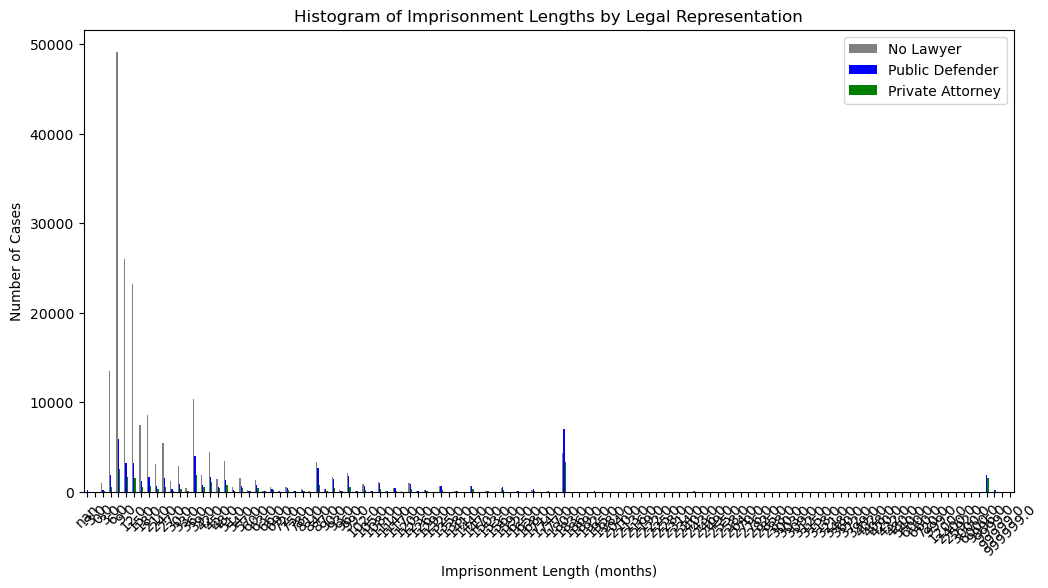

In [26]:
from pyspark.sql import SparkSession, functions as F
import pandas as pd
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("DrugCrimeAnalysis").getOrCreate()
# Assuming 'spark' is your SparkSession
df.show()

# Create a new column 'Representation' based on the 'lawyer' and 'public_defender' columns
df_convert = df.withColumn(
    "Representation",
    F.when((col("lawyer") == 0), "No Lawyer")
     .when((col("public_defender") == 1), "Public Defender")
     .otherwise("Private Attorney")
)

# Create bins for the imprisonment lengths
df_convert = df_convert.withColumn("ImprisonmentBin", F.floor(col("total_imprisonment_a") / 3) * 3)

# Group by imprisonment bin and type of legal representation, then count
df_grouped = df_convert.groupBy("ImprisonmentBin", "Representation").count()

# Collect data to Pandas DataFrame for visualization
pdf = df_grouped.toPandas()

# Pivot the data for plotting
pivot_pdf = pdf.pivot(index='ImprisonmentBin', columns='Representation', values='count').fillna(0)

# Set explicit colors for the bars
colors = ['gray', 'blue', 'green']  # Gray for no lawyer, Blue for public defender, Green for private attorney

# Create the histogram
pivot_pdf.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors)
plt.title('Histogram of Imprisonment Lengths by Legal Representation')
plt.xlabel('Imprisonment Length (months)')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(['No Lawyer', 'Public Defender', 'Private Attorney'])
plt.show()


# distribution of lawyer and nonlawyer cases: improved

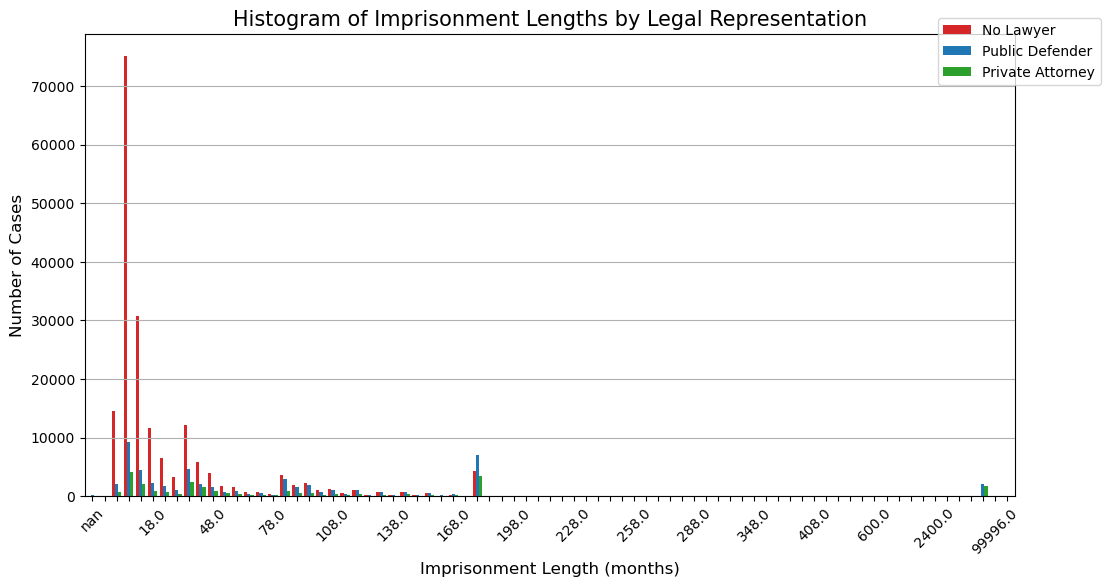

24/04/23 01:31:57 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 974522 ms exceeds timeout 120000 ms
24/04/23 01:31:57 WARN SparkContext: Killing executors is not supported by current scheduler.
24/04/23 01:32:03 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at o

In [107]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, floor, when
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'lawyer' from boolean to integer for easier processing
df_convert = df

# Create a new column 'Representation' based on the 'lawyer' and 'public_defender' columns
df_convert = df.withColumn(
    "Representation",
    when((col("lawyer") == 0), "No Lawyer")
     .when((col("public_defender") == 1), "Public Defender")
     .otherwise("Private Attorney")
)

# Create bins for the imprisonment lengths
df_convert = df_convert.withColumn("ImprisonmentBin", F.floor(col("total_imprisonment_a") / 6) * 6)

# Group by imprisonment bin and type of legal representation, then count
df_grouped = df_convert.groupBy("ImprisonmentBin", "Representation").count()

# Collect data to Pandas DataFrame for visualization
pdf = df_grouped.toPandas()


#Pivot the data for plotting
pivot_pdf = pdf.pivot(index='ImprisonmentBin', columns='Representation', values='count').fillna(0)
# Explicitly order columns to ensure they match the legend
#pivot_pdf = pivot_pdf[[0, 1]]  # Assuming 0 is 'No Lawyer' and 1 is 'Lawyer'


# Set explicit colors for the bars, corresponding to the three categories
colors = ['#d62728', '#1f77b4', '#2ca02c']  # Red, Blue, Green

# Create the histogram
ax = pivot_pdf.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors, width=0.8)
plt.title('Histogram of Imprisonment Lengths by Legal Representation', fontsize=15)
plt.xlabel('Imprisonment Length (months)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)

# Improve the tick marks to only show every nth tick for better clarity
# This block hides every label except for every 5th label
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)
        
plt.legend(['No Lawyer', 'Public Defender', 'Private Attorney'], loc='upper right', bbox_to_anchor=(1.1, 1.05))

# Add gridlines
plt.grid(axis='y')

plt.show()

# histogram of the drug amount (amount_a) by legal representation and drug type

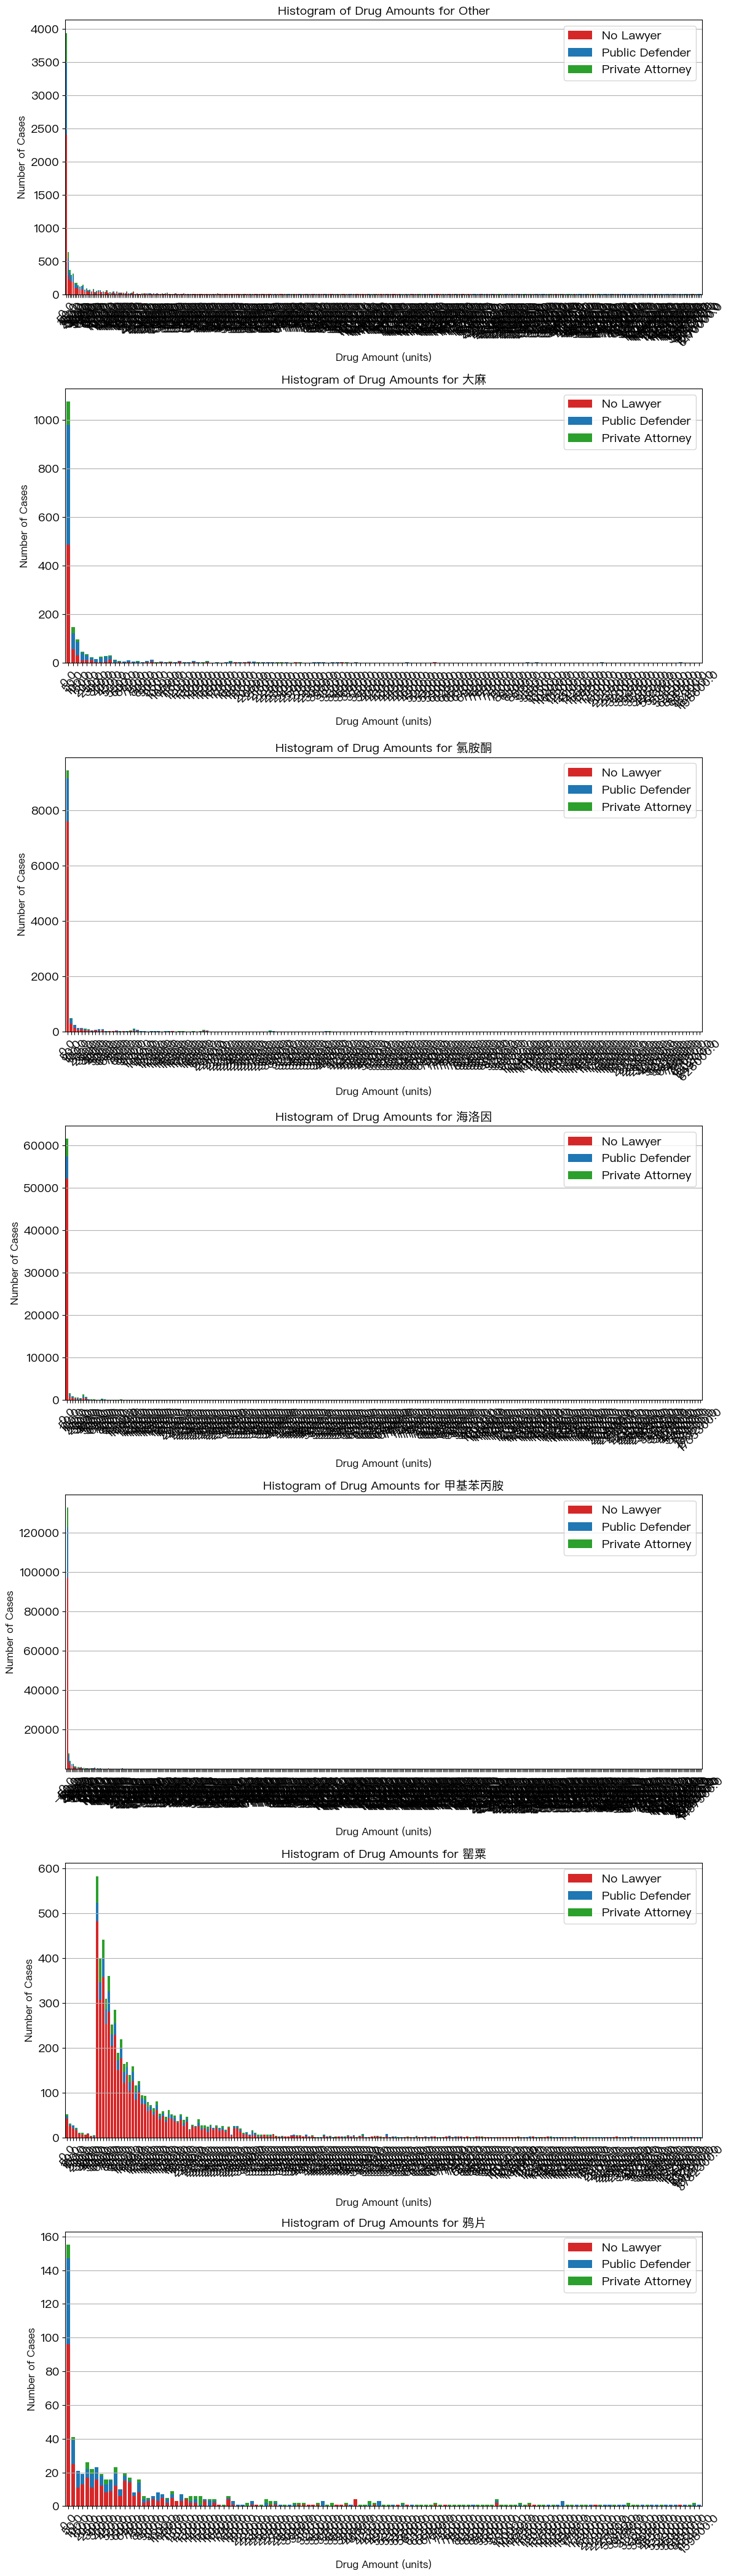

In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, floor, when
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Enable Chinese character support in matplotlib
font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc', size=14)  # Specify the path to a Chinese font file

# Convert 'lawyer' from boolean to integer for easier processing
df_convert = df

# Create a new column 'Representation' based on the 'lawyer' and 'public_defender' columns
df_convert = df.withColumn(
    "Representation",
    when((col("lawyer") == 0), "No Lawyer")
     .when((col("public_defender") == 1), "Public Defender")
     .otherwise("Private Attorney")
)

# Increase bin size for drug amount to reduce crowding on the x-axis, adjust bin size as needed
bin_size = 50  # Increase or decrease this value based on your data distribution
df_convert = df_convert.withColumn("AmountBin", floor(col("amount_a") / bin_size) * bin_size)

# Group by drug amount bin, type of drug, and type of legal representation, then count
df_grouped = df_convert.groupBy("AmountBin", "drug_a", "Representation").count()

# Collect data to Pandas DataFrame for visualization
pdf = df_grouped.toPandas()

# Pivot the data for plotting
pivot_pdf = pdf.pivot_table(index=['AmountBin', 'drug_a'], columns='Representation', values='count').fillna(0)

# Plot each drug type as a subplot
fig, axes = plt.subplots(nrows=len(pivot_pdf.index.levels[1]), figsize=(12, 6 * len(pivot_pdf.index.levels[1])))
for (drug_type, data), ax in zip(pivot_pdf.groupby(level=1), axes.flatten()):
    data.unstack().plot(kind='bar', stacked=True, ax=ax, color=['#d62728', '#1f77b4', '#2ca02c'], width=0.8)
    ax.set_title(f'Histogram of Drug Amounts for {drug_type}', fontsize=15, fontproperties=font)
    ax.set_xlabel('Drug Amount (units)', fontsize=12, fontproperties=font)
    ax.set_ylabel('Number of Cases', fontsize=12, fontproperties=font)
    ax.legend(['No Lawyer', 'Public Defender', 'Private Attorney'], loc='upper right', prop=font)
    ax.grid(axis='y')
    ax.tick_params(axis='x', rotation=45)
    # Apply font properties to tick labels for Chinese characters
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

plt.tight_layout()
plt.show()


# Regression 

In [53]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import *
from pyspark.sql.functions import col  # Import col to use for data manipulation

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Regression Analysis") \
    .getOrCreate()

schema = StructType([
    StructField("OriginalLink", StringType(), True),
    StructField("CaseNumber", StringType(), True),
    StructField("CaseName", StringType(), True),
    StructField("Court", StringType(), True),
    StructField("Location", StringType(), True),
    StructField("CaseType", StringType(), True),
    StructField("TrialProcedure", StringType(), True),
    StructField("JudgmentDate", StringType(), True),
    StructField("PublicationDate", StringType(), True),
    StructField("PartiesInvolved", StringType(), True),
    StructField("CausesofAction", StringType(), True),
    StructField("LegalBasis", StringType(), True),
    StructField("FullText", StringType(), True),
    StructField("drug_a", StringType(), True),
    StructField("amount_a", FloatType(), True),
    StructField("charge_criminal_a", StringType(), True),
    StructField("total_imprisonment_a", IntegerType(), True),
    StructField("lawyer", IntegerType(), True),
    StructField("public_defender", IntegerType(), True),
    StructField("private_attorney", IntegerType(), True)
])

# Load data with defined schema
df = spark.read.csv("/Users/jiaruisong/Documents/Coding/INFO 288 Big Data and Development_Data/drug_related_full_dataset_type_amount_cleaned_penalty_lawyer", header=True, schema=schema)




# Filter rows where total_imprisonment_a is less than 180
df = df.filter(col("total_imprisonment_a") < 180)

df = df.filter((col("amount_a") >= 1.0) & (col("amount_a") <= 10.0))


df = df.filter(col("charge_criminal_a") == '贩卖毒品罪')
df = df.filter(col("drug_a") == '甲基苯丙胺')

df.show()

# Drop rows with any nulls in these columns
df = df.na.drop(subset=["amount_a", "private_attorney", "public_defender"])

# Convert amount_a to double type
df = df.withColumn("amount_a", col("amount_a").cast("double"))

# Prepare data for regression model
feature_cols = ["amount_a", "private_attorney", "public_defender"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_features = assembler.transform(df)

# Define the regression model
lr = LinearRegression(featuresCol="features", labelCol="total_imprisonment_a")

# Fit the model
model = lr.fit(df_features)
summary = model.summary

# Print the coefficients and intercept
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

# Display more detailed statistics
print("RMSE: " + str(summary.rootMeanSquaredError))
print("r2: " + str(summary.r2))
print("Explained Variance: " + str(summary.explainedVariance))

# Print residuals if needed
print("Residuals: ")
summary.residuals.show()

# Optional: Print p-values and t-values if available
if hasattr(summary, 'pValues'):
    print("P-values: " + str(summary.pValues))
if hasattr(summary, 'tValues'):
    print("T-values: " + str(summary.tValues))

# Stop Spark Session
spark.stop()


+--------------------+------------------------------+-------------------------------------+----------------------------+--------------------+--------+--------------+------------+---------------+---------------+--------------------------+-------------------------------------+-------------------------------------+----------+--------+-----------------+--------------------+------+---------------+----------------+
|        OriginalLink|                    CaseNumber|                             CaseName|                       Court|            Location|CaseType|TrialProcedure|JudgmentDate|PublicationDate|PartiesInvolved|            CausesofAction|                           LegalBasis|                             FullText|    drug_a|amount_a|charge_criminal_a|total_imprisonment_a|lawyer|public_defender|private_attorney|
+--------------------+------------------------------+-------------------------------------+----------------------------+--------------------+--------+--------------+---------

24/04/22 16:56:42 WARN Instrumentation: [385c6393] regParam is zero, which might cause numerical instability and overfitting.


Coefficients: [3.578468814960637,5.887769550083768,10.202738559808843]
Intercept: 10.169146098155624
RMSE: 17.613196035079447
r2: 0.2270944005976987
Explained Variance: 91.14992384141557
Residuals: 
+-------------------+
|          residuals|
+-------------------+
| 106.99691231435901|
| 29.857083836781584|
| -6.608418628641916|
| -8.013877670913704|
|-13.067404523556753|
|  21.89453812007033|
|-12.757471595330532|
| -4.212815841997674|
|-11.041777661703716|
| -3.045719993320045|
|   3.88695499337976|
|  11.81508372220561|
|  48.96610742811566|
|-5.0338925718843335|
|  9.584908434733094|
| 15.207677906878693|
|  5.278615021820947|
| -7.035863737692498|
| 13.127289779368805|
| -9.326083728076899|
+-------------------+
only showing top 20 rows

P-values: [0.0, 0.0, 0.0, 0.0]
T-values: [115.47668799909971, 30.94650253011799, 37.06320294572347, 76.50847005551654]


# a smaller regression on 甲基苯丙胺

In [45]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import *
from pyspark.sql.functions import col  # Import col to use for data manipulation

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Regression Analysis") \
    .getOrCreate()

schema = StructType([
    StructField("OriginalLink", StringType(), True),
    StructField("CaseNumber", StringType(), True),
    StructField("CaseName", StringType(), True),
    StructField("Court", StringType(), True),
    StructField("Location", StringType(), True),
    StructField("CaseType", StringType(), True),
    StructField("TrialProcedure", StringType(), True),
    StructField("JudgmentDate", StringType(), True),
    StructField("PublicationDate", StringType(), True),
    StructField("PartiesInvolved", StringType(), True),
    StructField("CausesofAction", StringType(), True),
    StructField("LegalBasis", StringType(), True),
    StructField("FullText", StringType(), True),
    StructField("drug_a", StringType(), True),
    StructField("amount_a", FloatType(), True),
    StructField("charge_criminal_a", StringType(), True),
    StructField("total_imprisonment_a", IntegerType(), True),
    StructField("lawyer", IntegerType(), True),
    StructField("public_defender", IntegerType(), True),
    StructField("private_attorney", IntegerType(), True)
])

# Load data with defined schema
df = spark.read.csv("/Users/jiaruisong/Documents/Coding/INFO 288 Big Data and Development_Data/drug_related_full_dataset_type_amount_cleaned_penalty_lawyer", header=True, schema=schema)

df.show()

# Filter rows for drug_a '甲基苯丙胺'
df = df.filter(col("drug_a") == '甲基苯丙胺')

# Further filter rows where total_imprisonment_a is less than 180
df = df.filter(col("total_imprisonment_a") < 180)

# Drop rows with any nulls in these columns
df = df.na.drop(subset=["amount_a", "private_attorney", "public_defender"])

# Convert amount_a to double type
df = df.withColumn("amount_a", col("amount_a").cast("double"))

# Prepare data for regression model
feature_cols = ["amount_a", "private_attorney", "public_defender"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_features = assembler.transform(df)

# Define the regression model
lr = LinearRegression(featuresCol="features", labelCol="total_imprisonment_a")

# Fit the model
model = lr.fit(df_features)
summary = model.summary

# Print the coefficients and intercept
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

# Display more detailed statistics
print("RMSE: " + str(summary.rootMeanSquaredError))
print("r2: " + str(summary.r2))
print("Explained Variance: " + str(summary.explainedVariance))

# Print residuals if needed
print("Residuals: ")
summary.residuals.show()

# Optional: Print p-values and t-values if available
if hasattr(summary, 'pValues'):
    print("P-values: " + str(summary.pValues))
if hasattr(summary, 'tValues'):
    print("T-values: " + str(summary.tValues))

# Stop Spark Session
spark.stop()


+--------------------+------------------------------+----------------------------------------+--------------------------------------+----------+--------+--------------+------------+---------------+--------------------+--------------------------+--------------------------------------+-------------------------------------+----------+--------+--------------------+--------------------+------+---------------+----------------+
|        OriginalLink|                    CaseNumber|                                CaseName|                                 Court|  Location|CaseType|TrialProcedure|JudgmentDate|PublicationDate|     PartiesInvolved|            CausesofAction|                            LegalBasis|                             FullText|    drug_a|amount_a|   charge_criminal_a|total_imprisonment_a|lawyer|public_defender|private_attorney|
+--------------------+------------------------------+----------------------------------------+--------------------------------------+----------+------

24/04/22 16:43:19 WARN Instrumentation: [986ce9d3] regParam is zero, which might cause numerical instability and overfitting.


Coefficients: [0.00010811295714493209,25.10983454256946,22.31112840831084]
Intercept: 24.90782307092699
RMSE: 33.68223163548686
r2: 0.09714069681599125
Explained Variance: 122.06266661567025
Residuals: 
+-------------------+
|          residuals|
+-------------------+
|  81.98207210411069|
|  38.09148284387989|
| -23.17982704921385|
|-15.907987402619788|
|-14.954571112936591|
|-10.908180924808953|
| -6.908454450613213|
|-19.907876046277025|
| -10.06999250664439|
|   95.0921336838895|
|-43.020546391637126|
|-17.907930102755596|
|-22.951068253784964|
| 39.976670780870705|
|  93.97718431741714|
| -14.90792577823499|
|  93.97801786821775|
| 11.092058004817574|
| 119.08068344086288|
|  -36.0188295579684|
+-------------------+
only showing top 20 rows

P-values: [6.26477536513903e-10, 0.0, 0.0, 0.0]
T-values: [6.184016749194207, 116.74434340432553, 69.68696492689497, 244.38918627504776]


# comparing model fitness on different province and different drug amount on 甲基苯丙胺

In [79]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col


# Filter rows where total_imprisonment_a is less than 180
df = df.filter(col("total_imprisonment_a") < 180)


df = df.filter(col("charge_criminal_a") == '贩卖毒品罪')
df = df.filter(col("drug_a") == '甲基苯丙胺')

df.show()

# Drop rows with any nulls in these columns
df = df.na.drop(subset=["amount_a", "private_attorney", "public_defender"])

# Convert amount_a to double type
df = df.withColumn("amount_a", col("amount_a").cast("double"))

# Define the feature columns and the label column
feature_cols = ["amount_a", "private_attorney", "public_defender"]
label_col = "total_imprisonment_a"

# Assemble the features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

# Function to fit a model and print results
def fit_and_evaluate(df):
    lr = LinearRegression(featuresCol="features", labelCol=label_col, regParam=0.01)
    model = lr.fit(df)
    print(f"Coefficients: {model.coefficients}")
    print(f"Intercept: {model.intercept}")
    summary = model.summary
    print(f"RMSE: {summary.rootMeanSquaredError}")
    print(f"r2: {summary.r2}")

# Loop over each province
provinces = df.select("Province").distinct().rdd.flatMap(lambda x: x).collect()
for province in provinces:
    print(f"Analysis for Province: {province}")
    df_province = df.filter(col("Province") == province).cache()
    
    count = df_province.count()
    # Print the count of records in the filtered dataset
    print(f"Number of records in {province}: {count}")
    if count < 1000: # Ensure there is enough data to fit a model
        print(f"Province {province} has less than 1000 records, skipping analysis")
        continue
    
    
    # You can further divide by drug amounts, e.g., [0-10], (10-20],(20-30],(30-40],(40-50], (50-100], >100
    amounts = [(0, 10), (10, 20),(20, 30),(30, 40),(40, 50),(50, 100), (100, float('inf'))]
    for lower, upper in amounts:
        print(f"Analyzing amounts between {lower} and {upper}")
        df_filtered = df_province.filter((col("amount_a") > lower) & (col("amount_a") <= upper)).cache()
        
        df_year_2010 = df_filtered.filter(
            col("JudgmentDate").startswith("2010-") |
            col("JudgmentDate").startswith("2011-") |
            col("JudgmentDate").startswith("2012-") |
            col("JudgmentDate").startswith("2013-") |
            col("JudgmentDate").startswith("2014-") |
            col("JudgmentDate").startswith("2015-")).cache()
        
        df_year_2016 = df_filtered.filter(~(
            col("JudgmentDate").startswith("2010-") |
            col("JudgmentDate").startswith("2011-") |
            col("JudgmentDate").startswith("2012-") |
            col("JudgmentDate").startswith("2013-") |
            col("JudgmentDate").startswith("2014-") |
            col("JudgmentDate").startswith("2015-"))).cache()

        count_filtered = df_year_2010.count()
        if count_filtered > 100:  # Ensure there is data to fit a model
            fit_and_evaluate(df_year_2010)
            print(f"Number of records in {province} between {lower} and {upper} from 2010-2015: {count_filtered}")
        else:
            print(f"Amounts between {lower} and {upper} in Province {province} from 2010-2015 has less than 100 records, skipping analysis")
            
        count_filtered = df_year_2016.count()
        if count_filtered > 100:  # Ensure there is data to fit a model
            fit_and_evaluate(df_year_2016)
            print(f"Number of records in {province} between {lower} and {upper} from 2016-: {count_filtered}")
        else:
            print(f"Amounts between {lower} and {upper} in Province {province} from 2016- has less than 100 records, skipping analysis")

# Close the Spark session at the end
spark.stop()


+--------------------+------------------------------+-------------------------------------+----------------------------+--------------------+--------+--------------+------------+---------------+--------------------+--------------------------+-------------------------------------+-------------------------------------+----------+--------+-----------------+--------------------+------+---------------+----------------+--------------+----------+--------------------+------------+------+
|        OriginalLink|                    CaseNumber|                             CaseName|                       Court|            Location|CaseType|TrialProcedure|JudgmentDate|PublicationDate|     PartiesInvolved|            CausesofAction|                           LegalBasis|                             FullText|    drug_a|amount_a|charge_criminal_a|total_imprisonment_a|lawyer|public_defender|private_attorney|      Province|      City|            District|  CourtLevel|Adcode|
+--------------------+--------

Analysis for Province: 西藏自治区


Number of records in 西藏自治区: 177
Province 西藏自治区 has less than 1000 records, skipping analysis
Analysis for Province: 北京市


Number of records in 北京市: 1227
Analyzing amounts between 0 and 10
Coefficients: [4.208004316140792,-2.0294771407214105,-2.147316013008914]
Intercept: 5.151116161388483
RMSE: 8.656678296590142
r2: 0.5681739604650826
Number of records in 北京市 between 0 and 10 from 2010-2015: 691
Coefficients: [2.3054731533769552,1.7500146111539427,1.9126148087604677]
Intercept: 7.128059885602675
RMSE: 10.179729908739517
r2: 0.22559206020879052
Number of records in 北京市 between 0 and 10 from 2016-: 371
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 北京市 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 10 and 20 in Province 北京市 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 北京市 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 北京市 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amount

Number of records in 辽宁省: 4617
Analyzing amounts between 0 and 10
Coefficients: [4.505788998815117,5.250827054265732,48.11526569315812]
Intercept: 6.631946624242674
RMSE: 15.100539693622263
r2: 0.3294954661257997
Number of records in 辽宁省 between 0 and 10 from 2010-2015: 1415
Coefficients: [4.673541446162587,6.706157142035212,7.604261260222462]
Intercept: 7.922789030488626
RMSE: 18.005513209389466
r2: 0.28108582053161857
Number of records in 辽宁省 between 0 and 10 from 2016-: 2369
Analyzing amounts between 10 and 20
Coefficients: [3.1837709127200555,2.952463980724096,0.0]
Intercept: 36.022152162053075
RMSE: 28.684601269509013
r2: 0.09514267736061666
Number of records in 辽宁省 between 10 and 20 from 2010-2015: 111
Coefficients: [2.59624798253223,-2.9801612691619264,-8.773733647571563]
Intercept: 39.858121763290534
RMSE: 37.05210383007462
r2: 0.05043405458139005
Number of records in 辽宁省 between 10 and 20 from 2016-: 196
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province

Number of records in 浙江省: 8613
Analyzing amounts between 0 and 10
Coefficients: [3.8330239772743813,8.858109068744433,14.869731016984696]
Intercept: 8.795744702518807
RMSE: 14.362272780611576
r2: 0.4105878440526537
Number of records in 浙江省 between 0 and 10 from 2010-2015: 3387
Coefficients: [3.092815029865133,13.435026328806549,18.02256455074738]
Intercept: 7.101683199189752
RMSE: 14.842812873919222
r2: 0.4113513441856814
Number of records in 浙江省 between 0 and 10 from 2016-: 3027
Analyzing amounts between 10 and 20
Coefficients: [1.8035938072215054,7.632202205545397,10.7576820956812]
Intercept: 44.04259447618068
RMSE: 26.17416984266113
r2: 0.061572334091029246
Number of records in 浙江省 between 10 and 20 from 2010-2015: 384
Coefficients: [2.246584189227695,49.54244104108419,51.2811269311825]
Intercept: -3.1301532305398263
RMSE: 25.1086365853349
r2: 0.281011293623892
Number of records in 浙江省 between 10 and 20 from 2016-: 379
Analyzing amounts between 20 and 30
Coefficients: [1.68899346089

Number of records in 广西壮族自治区: 5087
Analyzing amounts between 0 and 10
Coefficients: [3.8345509622110003,1.4123585469670359,2.2635763804113003]
Intercept: 5.897652479664369
RMSE: 13.336185431922484
r2: 0.26106759004269664
Number of records in 广西壮族自治区 between 0 and 10 from 2010-2015: 1389
Coefficients: [2.999373480449674,6.316737293461384,0.2150601728922478]
Intercept: 9.08647362050785
RMSE: 13.564095960534955
r2: 0.18595659019584676
Number of records in 广西壮族自治区 between 0 and 10 from 2016-: 2742
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 广西壮族自治区 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [2.902989718674421,-2.6059193935403284,28.567267100980043]
Intercept: 18.622678254635787
RMSE: 39.88560592159823
r2: 0.07137300084033882
Number of records in 广西壮族自治区 between 10 and 20 from 2016-: 189
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 广西壮族自治区 from 2010-2015 has less than 100 records, skipping analysis
Amo

Number of records in 海南省: 1668
Analyzing amounts between 0 and 10
Coefficients: [5.281647547305537,-0.7041481893424475,0.0]
Intercept: 9.26683597807991
RMSE: 14.88316779822651
r2: 0.35567359919423835
Number of records in 海南省 between 0 and 10 from 2010-2015: 616
Coefficients: [3.3678408375931594,12.9636328947314,3.216647020304801]
Intercept: 15.718591649952293
RMSE: 14.734580734876584
r2: 0.2145407751583157
Number of records in 海南省 between 0 and 10 from 2016-: 725
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 海南省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 10 and 20 in Province 海南省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 海南省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 海南省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amounts between 30 and 4

Number of records in 重庆市: 9726
Analyzing amounts between 0 and 10
Coefficients: [4.369685123432812,1.444553198416442,5.407170763315877]
Intercept: 7.154950666468632
RMSE: 9.291891281035378
r2: 0.4515631146118978
Number of records in 重庆市 between 0 and 10 from 2010-2015: 2944
Coefficients: [3.413796822712228,4.191435644046781,7.778073983658853]
Intercept: 7.429312640759555
RMSE: 9.143524714792818
r2: 0.36938437715494354
Number of records in 重庆市 between 0 and 10 from 2016-: 5693
Analyzing amounts between 10 and 20
Coefficients: [-1.1413724588204308,5.9639384632445465,-30.702409133247567]
Intercept: 88.47853806346627
RMSE: 29.484406209802977
r2: 0.03363865321728188
Number of records in 重庆市 between 10 and 20 from 2010-2015: 128
Coefficients: [1.829351974166128,17.753851428697242,17.517802744530567]
Intercept: 37.514230868026004
RMSE: 32.27079068590742
r2: 0.09122971971037708
Number of records in 重庆市 between 10 and 20 from 2016-: 296
Analyzing amounts between 20 and 30
Amounts between 20 and

Number of records in 河北省: 933
Province 河北省 has less than 1000 records, skipping analysis
Analysis for Province: 福建省


Number of records in 福建省: 5318
Analyzing amounts between 0 and 10
Coefficients: [4.709992997950415,2.001697649423377,20.994421099458236]
Intercept: 8.318004977093793
RMSE: 14.311985641644918
r2: 0.3458141112313532
Number of records in 福建省 between 0 and 10 from 2010-2015: 1601
Coefficients: [4.096745797037289,6.014404136548903,6.374749991065895]
Intercept: 10.335663924464392
RMSE: 15.661332690159405
r2: 0.2678630709366624
Number of records in 福建省 between 0 and 10 from 2016-: 2791
Analyzing amounts between 10 and 20
Coefficients: [1.340777997577387,0.5634124632101445,8.355773284278076]
Intercept: 58.84782969618585
RMSE: 25.872789979950316
r2: 0.023419277165711794
Number of records in 福建省 between 10 and 20 from 2010-2015: 156
Coefficients: [2.362673718196768,4.276410349327989,1.5138184627114921]
Intercept: 43.39150835729385
RMSE: 28.59895176969944
r2: 0.07142096738418124
Number of records in 福建省 between 10 and 20 from 2016-: 225
Analyzing amounts between 20 and 30
Amounts between 20 and 3

Number of records in 湖南省: 11499
Analyzing amounts between 0 and 10
Coefficients: [3.057213124291872,2.96308791335695,1.8946453008632174]
Intercept: 12.885861485659285
RMSE: 18.079062658810788
r2: 0.1643735593696657
Number of records in 湖南省 between 0 and 10 from 2010-2015: 1914


Coefficients: [3.2517086497859826,12.191536474363131,12.961210886957337]
Intercept: 14.24089527892102
RMSE: 19.12478968840576
r2: 0.21928021291303668
Number of records in 湖南省 between 0 and 10 from 2016-: 4577
Analyzing amounts between 10 and 20
Coefficients: [1.234286473944616,10.423616238155887,-8.014155264646302]
Intercept: 39.04309990849486
RMSE: 34.37756494775308
r2: 0.03069983097487028
Number of records in 湖南省 between 10 and 20 from 2010-2015: 310
Coefficients: [1.5868216272489903,15.251415473311814,7.8984902922588756]
Intercept: 33.201533000009015
RMSE: 35.611484470781676
r2: 0.05115990276095572
Number of records in 湖南省 between 10 and 20 from 2016-: 707
Analyzing amounts between 20 and 30
Coefficients: [0.5849867622570839,12.188854300239845,25.44833504923091]
Intercept: 45.5999930472029
RMSE: 42.36161914579348
r2: 0.017176832619216653
Number of records in 湖南省 between 20 and 30 from 2010-2015: 148
Coefficients: [1.1694931708066463,11.521149714386647,5.744371788756888]
Intercept: 3

Coefficients: [0.0011730020364390705,19.759030120629788,-1.6611374323455046]
Intercept: 31.57995579121759
RMSE: 33.69378078683943
r2: 0.051728000064222734
Number of records in 湖南省 between 100 and inf from 2010-2015: 805
Coefficients: [0.0006729024722322421,28.334558177342043,18.885825193571865]
Intercept: 27.250969963433278
RMSE: 31.00995475220576
r2: 0.12796845029702364
Number of records in 湖南省 between 100 and inf from 2016-: 1775
Analysis for Province: 宁夏回族自治区


Number of records in 宁夏回族自治区: 396
Province 宁夏回族自治区 has less than 1000 records, skipping analysis
Analysis for Province: 陕西省


Number of records in 陕西省: 1168
Analyzing amounts between 0 and 10
Coefficients: [3.4093432295111814,0.9668861471051502,-0.828327854655657]
Intercept: 7.877146675117408
RMSE: 14.625793488432436
r2: 0.2523611151012515
Number of records in 陕西省 between 0 and 10 from 2010-2015: 341
Coefficients: [3.404092122436621,8.198403938418837,6.937143339464104]
Intercept: 9.457341799192454
RMSE: 15.637625975697215
r2: 0.27479616930521145
Number of records in 陕西省 between 0 and 10 from 2016-: 521
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 陕西省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 10 and 20 in Province 陕西省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 陕西省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 陕西省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amounts 

Number of records in 山西省: 1064
Analyzing amounts between 0 and 10
Coefficients: [1.0922139003139373,5.412720278310667,48.927285263191266]
Intercept: 22.445350259759728
RMSE: 19.773557665362887
r2: 0.10602800066737028
Number of records in 山西省 between 0 and 10 from 2010-2015: 139
Coefficients: [3.119622162800641,8.765880738351546,10.019675042237122]
Intercept: 25.28180925113646
RMSE: 24.288794622239926
r2: 0.13518303688089395
Number of records in 山西省 between 0 and 10 from 2016-: 388
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 山西省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [3.912049624668096,20.389227029123223,0.03596040233816253]
Intercept: 12.594400591381136
RMSE: 31.829231611415437
r2: 0.18908506867183417
Number of records in 山西省 between 10 and 20 from 2016-: 107
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 山西省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 i

Number of records in 内蒙古自治区: 608
Province 内蒙古自治区 has less than 1000 records, skipping analysis
Analysis for Province: 甘肃省


Number of records in 甘肃省: 665
Province 甘肃省 has less than 1000 records, skipping analysis
Analysis for Province: 贵州省


Number of records in 贵州省: 3937
Analyzing amounts between 0 and 10
Coefficients: [4.183279533172677,2.8460203322296547,1.2362445318763797]
Intercept: 7.217505512957999
RMSE: 10.283931512862255
r2: 0.4299102717898857
Number of records in 贵州省 between 0 and 10 from 2010-2015: 1162
Coefficients: [2.5154726251250406,5.904582683195354,5.4947250456538645]
Intercept: 9.174721250620554
RMSE: 13.483875437459648
r2: 0.17112033382564984
Number of records in 贵州省 between 0 and 10 from 2016-: 1594
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 贵州省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [1.8555791711948126,20.076434368132876,-3.691643419046606]
Intercept: 16.35970270136106
RMSE: 36.63705046318475
r2: 0.07274237624361624
Number of records in 贵州省 between 10 and 20 from 2016-: 181
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 贵州省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in

Number of records in 湖北省: 7783
Analyzing amounts between 0 and 10


Coefficients: [3.715285550964872,3.839249438791846,6.483337343311272]
Intercept: 5.1989808309351195
RMSE: 11.262472799793349
r2: 0.38585560291576826
Number of records in 湖北省 between 0 and 10 from 2010-2015: 2163
Coefficients: [3.323198328996522,8.485995033476227,12.520635887527579]
Intercept: 6.314800268622938
RMSE: 14.792266793477173
r2: 0.32335264381175877
Number of records in 湖北省 between 0 and 10 from 2016-: 3679
Analyzing amounts between 10 and 20
Coefficients: [3.2711496349841203,15.92465826120864,42.917525535183955]
Intercept: 5.718992594818919
RMSE: 34.40037345276807
r2: 0.15625071578386407
Number of records in 湖北省 between 10 and 20 from 2010-2015: 196
Coefficients: [0.6711106124172034,20.717665202345067,19.643452578017467]
Intercept: 43.03360944180447
RMSE: 35.69061567582496
r2: 0.07802228198664418
Number of records in 湖北省 between 10 and 20 from 2016-: 541
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 湖北省 from 2010-2015 has less than 100 records, ski

Number of records in 四川省: 10637
Analyzing amounts between 0 and 10


Coefficients: [3.9073838394857097,4.27362954241821,7.245594317920571]
Intercept: 8.330347608990868
RMSE: 14.48357358796884
r2: 0.28368165266326406
Number of records in 四川省 between 0 and 10 from 2010-2015: 2544


Coefficients: [3.214788489737488,7.386331515109331,16.84190166495919]
Intercept: 12.248539139467574
RMSE: 18.74879190500945
r2: 0.2225226657968572
Number of records in 四川省 between 0 and 10 from 2016-: 4767
Analyzing amounts between 10 and 20
Coefficients: [1.8838117098433262,4.657167312535376,2.473912010163085]
Intercept: 43.22728852804574
RMSE: 32.09142073817379
r2: 0.03385612427189344
Number of records in 四川省 between 10 and 20 from 2010-2015: 221
Coefficients: [2.162841666630155,16.42678960250542,9.568419596737206]
Intercept: 33.0290522658507
RMSE: 34.544685424926676
r2: 0.07440152096269159
Number of records in 四川省 between 10 and 20 from 2016-: 626
Analyzing amounts between 20 and 30
Coefficients: [1.0549454319483593,2.944536496275233,20.399103680914504]
Intercept: 50.87584392712688
RMSE: 39.8399653791103
r2: 0.011992880399059658
Number of records in 四川省 between 20 and 30 from 2010-2015: 104
Coefficients: [1.6677923525554819,22.587822916311158,27.025667758710323]
Intercept: 25.978745

Number of records in 天津市: 945
Province 天津市 has less than 1000 records, skipping analysis
Analysis for Province: 黑龙江省


Number of records in 黑龙江省: 1434
Analyzing amounts between 0 and 10
Coefficients: [4.240543945317833,8.542711020019736,18.62368730357715]
Intercept: 8.10176569510071
RMSE: 17.655921248310584
r2: 0.33294816528899873
Number of records in 黑龙江省 between 0 and 10 from 2010-2015: 334
Coefficients: [3.522743056272598,8.149244698227136,2.7584112916554777]
Intercept: 13.064590689123694
RMSE: 17.17773709532557
r2: 0.2499752040394233
Number of records in 黑龙江省 between 0 and 10 from 2016-: 683
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 黑龙江省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 10 and 20 in Province 黑龙江省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 黑龙江省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 黑龙江省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amou

Number of records in 广东省: 18197
Analyzing amounts between 0 and 10


Coefficients: [4.68627175263403,-1.4846682366987047,-2.4150442355196056]
Intercept: 6.420313287307012
RMSE: 12.247880643991419
r2: 0.42248645766341997
Number of records in 广东省 between 0 and 10 from 2010-2015: 7023


Coefficients: [3.5553810305405245,1.5413299636905782,8.382572310261452]
Intercept: 9.471169489768569
RMSE: 14.242978392738594
r2: 0.2648686353266534
Number of records in 广东省 between 0 and 10 from 2016-: 7488
Analyzing amounts between 10 and 20
Coefficients: [1.6426785890226683,-0.6731729346706622,-18.10903977798758]
Intercept: 54.302833608702365
RMSE: 27.53264080284045
r2: 0.0343793745625709
Number of records in 广东省 between 10 and 20 from 2010-2015: 559
Coefficients: [1.1170287432177575,7.329619242810259,0.5773124070909573]
Intercept: 50.13390281983318
RMSE: 32.61214008810384
r2: 0.020873034912709976
Number of records in 广东省 between 10 and 20 from 2016-: 696
Analyzing amounts between 20 and 30
Coefficients: [0.5687777901550346,1.5393317090604868,51.61853943220193]
Intercept: 76.60854393762496
RMSE: 28.659233725879623
r2: 0.018346786298968798
Number of records in 广东省 between 20 and 30 from 2010-2015: 242
Coefficients: [0.5661896437423802,14.312224538048326,6.6799480220929315]
Intercept:

Amounts between 50 and 100 in Province 广东省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [-0.27437107676436656,51.39386416711221,35.48663545157718]
Intercept: 51.2804433280792
RMSE: 45.44901908248098
r2: 0.2218077938100811
Number of records in 广东省 between 50 and 100 from 2016-: 178
Analyzing amounts between 100 and inf


Coefficients: [-4.614145237501688e-05,22.34580286120982,65.59706345468877]
Intercept: 35.66634093143478
RMSE: 40.782972556155066
r2: 0.09787447076212286
Number of records in 广东省 between 100 and inf from 2010-2015: 289
Coefficients: [0.0008000085812485232,15.295466908291806,9.67375061405083]
Intercept: 21.062111710060265
RMSE: 26.432676986047174
r2: 0.0648268563261909
Number of records in 广东省 between 100 and inf from 2016-: 872
Analysis for Province: 山东省


Number of records in 山东省: 3941
Analyzing amounts between 0 and 10


Coefficients: [3.596426034041144,2.391181735392597,1.9221735430712379]
Intercept: 14.400674977475347
RMSE: 16.123513229456016
r2: 0.26883031472056906
Number of records in 山东省 between 0 and 10 from 2010-2015: 1092


Coefficients: [4.090434837982305,2.1716128831467394,0.9423348372944264]
Intercept: 13.941478743795718
RMSE: 17.75233776852222
r2: 0.2593647748619372
Number of records in 山东省 between 0 and 10 from 2016-: 1623
Analyzing amounts between 10 and 20


Coefficients: [1.237032658300762,-2.0010943283296827,0.0]
Intercept: 59.916495453444774
RMSE: 26.088282038316073
r2: 0.01976182646116842
Number of records in 山东省 between 10 and 20 from 2010-2015: 167


Coefficients: [2.044984627830458,-8.001414600953675,-6.947713053881422]
Intercept: 49.41623212855882
RMSE: 26.914040134594128
r2: 0.06522112641755995
Number of records in 山东省 between 10 and 20 from 2016-: 230
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 山东省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [3.551673714648558,8.262927869469811,-5.041037576839094]
Intercept: -5.542655197652825
RMSE: 36.32891682565521
r2: 0.10211490080505825
Number of records in 山东省 between 20 and 30 from 2016-: 129
Analyzing amounts between 30 and 40
Amounts between 30 and 40 in Province 山东省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 30 and 40 in Province 山东省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 40 and 50
Amounts between 40 and 50 in Province 山东省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 40 and 50 in Province 山东省 from 2016- has less than 100 

Number of records in 新疆维吾尔自治区: 467
Province 新疆维吾尔自治区 has less than 1000 records, skipping analysis
Analysis for Province: 河南省


Number of records in 河南省: 1864
Analyzing amounts between 0 and 10


Coefficients: [3.2142362343943667,2.5339744418212664,4.669182961735122]
Intercept: 6.656360339767534
RMSE: 13.49142719388559
r2: 0.25880525857638226
Number of records in 河南省 between 0 and 10 from 2010-2015: 486
Coefficients: [3.785185717787454,9.85377732439996,3.790718530811762]
Intercept: 8.201281310981491
RMSE: 18.672352924731722
r2: 0.24397465914803662
Number of records in 河南省 between 0 and 10 from 2016-: 806
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 河南省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [1.242144630781427,17.78192664729897,23.851639842868508]
Intercept: 30.022072340293345
RMSE: 32.77137093178753
r2: 0.11583933524781564
Number of records in 河南省 between 10 and 20 from 2016-: 107
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 河南省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 河南省 from 2016- has less than 100 records, skipping analysis
An

Amounts between 100 and inf in Province 河南省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [0.0011341165348082293,37.89111330035273,17.532653447982064]
Intercept: 11.247492345034047
RMSE: 27.07338544068321
r2: 0.29845537688990176
Number of records in 河南省 between 100 and inf from 2016-: 147
Analysis for Province: 吉林省


Number of records in 吉林省: 1719
Analyzing amounts between 0 and 10
Coefficients: [4.665697760888528,1.5830022321686332,-7.474673628118805]
Intercept: 8.141208577277151
RMSE: 17.24303401940025
r2: 0.3191813093888781
Number of records in 吉林省 between 0 and 10 from 2010-2015: 408
Coefficients: [3.8676378209310096,1.3248709587905432,6.197071968311157]
Intercept: 10.060678544786624
RMSE: 15.644886788916036
r2: 0.2696861770621781
Number of records in 吉林省 between 0 and 10 from 2016-: 856
Analyzing amounts between 10 and 20


Amounts between 10 and 20 in Province 吉林省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [2.0162307095624223,10.545575049148635,-8.569831119337003]
Intercept: 30.496764210244194
RMSE: 31.86167093043905
r2: 0.05456547658227717
Number of records in 吉林省 between 10 and 20 from 2016-: 108
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 吉林省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 吉林省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amounts between 30 and 40 in Province 吉林省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 30 and 40 in Province 吉林省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 40 and 50
Amounts between 40 and 50 in Province 吉林省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 40 and 50 in Province 吉林省 from 2016- has less than 100 records

Number of records in 上海市: 5147
Analyzing amounts between 0 and 10


Coefficients: [4.673640940493306,0.3856107917373509,3.9875990121495297]
Intercept: 1.3630971412259554
RMSE: 8.38807876216543
r2: 0.556266048243967
Number of records in 上海市 between 0 and 10 from 2010-2015: 2676


Coefficients: [3.4630396068568197,0.7180569248591726,3.700939471072039]
Intercept: 2.9058998664283515
RMSE: 8.520659912203396
r2: 0.4343207750154615
Number of records in 上海市 between 0 and 10 from 2016-: 1972
Analyzing amounts between 10 and 20
Coefficients: [0.6993523746625321,11.976686238311428,18.331305920811893]
Intercept: 60.756298625021294
RMSE: 20.578261367321403
r2: 0.10469145325484286
Number of records in 上海市 between 10 and 20 from 2010-2015: 153
Amounts between 10 and 20 in Province 上海市 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 上海市 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 上海市 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amounts between 30 and 40 in Province 上海市 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 30 and 40 in Province 上海市 from 2016- has less than 10

Number of records in 青海省: 249
Province 青海省 has less than 1000 records, skipping analysis
Analysis for Province: 江西省


Number of records in 江西省: 4007
Analyzing amounts between 0 and 10


Coefficients: [3.7602055872341063,2.138433358115586,8.374580905314131]
Intercept: 13.65173039503534
RMSE: 16.41179146367943
r2: 0.2925148307987703
Number of records in 江西省 between 0 and 10 from 2010-2015: 475


Coefficients: [2.367103853911829,9.103210336748198,13.80239794016806]
Intercept: 15.24139707852724
RMSE: 18.172334981653503
r2: 0.1754835623470249
Number of records in 江西省 between 0 and 10 from 2016-: 2049
Analyzing amounts between 10 and 20
Amounts between 10 and 20 in Province 江西省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [0.880548604157992,15.134952864467188,4.3103121248099034]
Intercept: 43.483611017305236
RMSE: 32.26684751984361
r2: 0.04163359411963885
Number of records in 江西省 between 10 and 20 from 2016-: 321
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 江西省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [0.8940258271982199,9.08966102738889,19.968848938478924]
Intercept: 46.51088430259825
RMSE: 35.931868783054874
r2: 0.04943244154915005
Number of records in 江西省 between 20 and 30 from 2016-: 141
Analyzing amounts between 30 and 40
Amounts between 30 and 40 in Province 江西省 from 2010-2015 has less

Amounts between 100 and inf in Province 江西省 from 2010-2015 has less than 100 records, skipping analysis
Coefficients: [0.0006781557974533403,22.58713874388673,15.257234249433262]
Intercept: 25.720374775059707
RMSE: 26.422227916354004
r2: 0.12302718636669219
Number of records in 江西省 between 100 and inf from 2016-: 625
Analysis for Province: 安徽省


Number of records in 安徽省: 2207
Analyzing amounts between 0 and 10


Coefficients: [4.683939709595144,2.5644815331797024,-1.026819265001159]
Intercept: 13.418056270621285
RMSE: 16.941364332097343
r2: 0.2953633490059777
Number of records in 安徽省 between 0 and 10 from 2010-2015: 734


Coefficients: [5.209904922169654,6.735813428516721,8.576095635632665]
Intercept: 11.095972248822784
RMSE: 20.700655542988557
r2: 0.2879791088260857
Number of records in 安徽省 between 0 and 10 from 2016-: 901
Analyzing amounts between 10 and 20


Amounts between 10 and 20 in Province 安徽省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 10 and 20 in Province 安徽省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 20 and 30
Amounts between 20 and 30 in Province 安徽省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 20 and 30 in Province 安徽省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 30 and 40
Amounts between 30 and 40 in Province 安徽省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 30 and 40 in Province 安徽省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 40 and 50
Amounts between 40 and 50 in Province 安徽省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 40 and 50 in Province 安徽省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 50 and 100
Amounts between 50 and 100 in Province 安徽省 from 2010-20

Number of records in 江苏省: 6290
Analyzing amounts between 0 and 10


Coefficients: [5.056235409805278,4.744632566727252,5.297439230162018]
Intercept: 6.184797704373256
RMSE: 14.677286917157378
r2: 0.44327609106257193
Number of records in 江苏省 between 0 and 10 from 2010-2015: 1867


Coefficients: [4.329259835488789,4.4243126220936055,8.800056905812554]
Intercept: 7.601506880760472
RMSE: 15.267050629531013
r2: 0.31911955314083107
Number of records in 江苏省 between 0 and 10 from 2016-: 3147
Analyzing amounts between 10 and 20


Coefficients: [1.0010851381272663,-10.790973349086551,-20.333828100629415]
Intercept: 70.92048545343873
RMSE: 23.3057451732286
r2: 0.0610597784131619
Number of records in 江苏省 between 10 and 20 from 2010-2015: 211
Coefficients: [-0.026291585351317353,4.190405564796061,-0.2856409575249673]
Intercept: 75.80923020756794
RMSE: 27.86816871636403
r2: 0.005677542718131479
Number of records in 江苏省 between 10 and 20 from 2016-: 273
Analyzing amounts between 20 and 30


Coefficients: [2.1021040676937015,-4.50625650856069,0.0]
Intercept: 46.17303427064492
RMSE: 18.015937220836577
r2: 0.08602196735009016
Number of records in 江苏省 between 20 and 30 from 2010-2015: 110
Coefficients: [2.2167499031754656,12.296995234589373,0.28946745888715586]
Intercept: 30.961656760520157
RMSE: 31.911874398051587
r2: 0.07430250932886162
Number of records in 江苏省 between 20 and 30 from 2016-: 149
Analyzing amounts between 30 and 40
Amounts between 30 and 40 in Province 江苏省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 30 and 40 in Province 江苏省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 40 and 50
Amounts between 40 and 50 in Province 江苏省 from 2010-2015 has less than 100 records, skipping analysis
Amounts between 40 and 50 in Province 江苏省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 50 and 100
Amounts between 50 and 100 in Province 江苏省 from 2010-2015 has less than 100 recor

Amounts between 50 and 100 in Province 江苏省 from 2016- has less than 100 records, skipping analysis
Analyzing amounts between 100 and inf


Amounts between 100 and inf in Province 江苏省 from 2010-2015 has less than 100 records, skipping analysis


Coefficients: [-0.0019460127547355913,48.898917716566004,46.251123041352365]
Intercept: 31.040230205676764
RMSE: 40.919765136078674
r2: 0.23797045135502115
Number of records in 江苏省 between 100 and inf from 2016-: 141
Analysis for Province: 云南省


Number of records in 云南省: 5472
Analyzing amounts between 0 and 10


Coefficients: [3.9669156067974796,-0.8188581484760554,3.239110690778132]
Intercept: 14.817187836515128
RMSE: 16.09258941533839
r2: 0.29376569252842855
Number of records in 云南省 between 0 and 10 from 2010-2015: 560


Coefficients: [3.096168125496088,0.5796044853379748,0.3421914020878422]
Intercept: 18.20789092141112
RMSE: 18.943393032156376
r2: 0.15741570730673438
Number of records in 云南省 between 0 and 10 from 2016-: 2538
Analyzing amounts between 10 and 20


Coefficients: [1.5709246207508276,-7.597481991978522,-5.076149508497296]
Intercept: 62.04778679188813
RMSE: 28.684110993140596
r2: 0.04114433510998461
Number of records in 云南省 between 10 and 20 from 2010-2015: 174


Coefficients: [0.6527295986242253,-0.5837035623396271,4.961351964476547]
Intercept: 66.54625351584075
RMSE: 30.75709334583393
r2: 0.007414184802417512
Number of records in 云南省 between 10 and 20 from 2016-: 622
Analyzing amounts between 20 and 30


Amounts between 20 and 30 in Province 云南省 from 2010-2015 has less than 100 records, skipping analysis


Coefficients: [0.13888896967348507,-3.7528147829576217,2.175212888129843]
Intercept: 81.59101708614212
RMSE: 37.27095974808769
r2: 0.0025452273310486717
Number of records in 云南省 between 20 and 30 from 2016-: 300
Analyzing amounts between 30 and 40


Amounts between 30 and 40 in Province 云南省 from 2010-2015 has less than 100 records, skipping analysis


Coefficients: [0.7221368078365987,3.2485372429246446,2.575682982659231]
Intercept: 61.955244616951425
RMSE: 44.20254420417867
r2: 0.0033113560740720693
Number of records in 云南省 between 30 and 40 from 2016-: 146
Analyzing amounts between 40 and 50


Amounts between 40 and 50 in Province 云南省 from 2010-2015 has less than 100 records, skipping analysis


Coefficients: [-5.303106776647327,-6.106801218161457,6.700707215449822]
Intercept: 325.3385856527182
RMSE: 49.741550460483424
r2: 0.09885047135283365
Number of records in 云南省 between 40 and 50 from 2016-: 108
Analyzing amounts between 50 and 100


Amounts between 50 and 100 in Province 云南省 from 2010-2015 has less than 100 records, skipping analysis


Coefficients: [-0.14330387291515226,14.296143798944811,22.124883564636495]
Intercept: 57.76758688747618
RMSE: 46.4563214651776
r2: 0.03711194810589313
Number of records in 云南省 between 50 and 100 from 2016-: 147
Analyzing amounts between 100 and inf


Coefficients: [-0.0010961231716547046,35.53521931066358,37.909506737475056]
Intercept: 36.67288439050853
RMSE: 39.29128495972369
r2: 0.14186073250213904
Number of records in 云南省 between 100 and inf from 2010-2015: 105


Coefficients: [0.001639290312443141,7.052505383376345,8.195899042355675]
Intercept: 32.73053122926529
RMSE: 37.51490158040219
r2: 0.025791737833143147
Number of records in 云南省 between 100 and inf from 2016-: 600
Analysis for Province: None
Number of records in None: 0
Province None has less than 1000 records, skipping analysis
